# Exportações e importações brasileiras (1997 - atual)
## Fonte: base de dados do Ministério da Indústria, Comércio Exterior e Serviços
### http://www.mdic.gov.br/comercio-exterior/estatisticas-de-comercio-exterior/base-de-dados-do-comercio-exterior-brasileiro-arquivos-para-download

---

In [1]:
import urllib.request
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# DIGITE ANO E TIPO

ano = int(input('Digite o ano (1997 - ano atual): '))
tipo = input('Digite o código da atividade (EXP para exportações e IMP para importações): ').upper()

# URL BASEADO NO ANO E TIPO 

if 1996 < ano <= int(str(datetime.date.today())[:4]) and (tipo == 'IMP' or tipo == 'EXP'):
    url='http://www.mdic.gov.br/balanca/bd/comexstat-bd/mun/'+ tipo +'_'+ str(ano) +'_MUN.csv'
else:
    print('Erro: Ano ou código não são válidos.')
url

Digite o ano (1997 - ano atual): 2017
Digite o código da atividade (EXP para exportações e IMP para importações): exp


'http://www.mdic.gov.br/balanca/bd/comexstat-bd/mun/EXP_2017_MUN.csv'

In [3]:
# CRIANDO NOME DO ARQUIVO. SE ANO CORRENTE, ESPECIFICA MES (ARQUIVOS MUDAM MENSALMENTE ATE O FINAL DO ANO)

# SE E O ANO ATUAL:
if str(ano) == str(datetime.date.today())[:4]:
    file_name = tipo + '_' + str(datetime.date.today())[:7] + '.csv'
# SE NAO E O ANO ATUAL
else:
    file_name = tipo + '_' + str(ano) + '.csv'
    
file_name

'EXP_2017.csv'

In [4]:
import os.path

# CHECANDO SE O ARQUIVO JA EXISTE
if os.path.isfile(file_name) == True:
    print('Arquivo ja existe')
# CASO CONTRARIO
else:
    # DOWNLOAD DO ARQUIVO CSV DO WEBSITE
    request = urllib.request.Request(url)
    # DADOS RAW
    data = urllib.request.urlopen(request).read()
    # CRIACAO DO ARQUIVO
    file = open(file_name, 'wb')
    file.write(data)
    file.close()

Arquivo ja existe


In [5]:
# TRATANDO DADOS

import pandas as pd
#DATAFRAME
df = pd.read_csv(file_name, sep=';')
df.head()

,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB
0,2017,7,7318,63,MG,3118601,2812,4032
1,2017,7,9018,603,SP,3450308,25,5037
2,2017,7,6104,249,SC,4204608,32,3342
3,2017,7,9032,249,SP,3449904,73,471617
4,2017,7,8708,23,SP,3423107,49699,535008


In [6]:
# alterando os tipos para categoria

df.CO_ANO = df.CO_ANO.astype('category')
df.CO_MES = df.CO_MES.astype('category')
df.SH4 = df.SH4.astype('category')
df.CO_PAIS = df.CO_PAIS.astype('category')
df.SG_UF_MUN = df.SG_UF_MUN.astype('category')
df.CO_MUN  = df.CO_MUN .astype('category')

---

##  1. Análise por Estados

-----

In [7]:
# LISTA DOS ESTADOS DA TABELA
lista_estados=[]
for i in df.SG_UF_MUN.cat.categories:
    lista_estados.append(i)
print(lista_estados)

['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'EX', 'GO', 'MA', 'MG', 'MS', 'MT', 'ND', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']


In [8]:
# LISTA DAS EXPORTACOES/IMPORTACOES DOS ESTADOS DA TABELA
lista_transacao_estado=[]
for i in lista_estados:
    lista_transacao_estado.append(df[df.SG_UF_MUN==i].VL_FOB.sum())
print(lista_transacao_estado)

[25613473, 605609379, 715409872, 269486731, 7860613876, 2113694364, 101496437, 8551688748, 775240, 5533990769, 3015502510, 24523572933, 3514883974, 11854105786, 873334, 14330397918, 147573475, 2092683612, 322515736, 19480114385, 24288944100, 293660043, 1088060602, 50554327, 16283822099, 11037809369, 90223006, 58559515923, 986026445]


In [9]:
# BALANCA LISTA_ESTADO E LISTA_TRANSACAO
balanca_estado = pd.DataFrame({'Estado': lista_estados, 'Transacao' : lista_transacao_estado})
# SORT
balanca_estado = balanca_estado.sort_values(by=['Transacao'], ascending=False)
# PORCENTAGEM DA PARTICIPACAO DE CADA ESTADO
balanca_estado['Porcentagem'] = balanca_estado.Transacao/balanca_estado.Transacao.sum()
balanca_estado.head()

,Estado,Transacao,Porcentagem
27,SP,58559515923,0.268943
11,MG,24523572933,0.112628
20,RJ,24288944100,0.111551
19,PR,19480114385,0.089465
24,RS,16283822099,0.074786


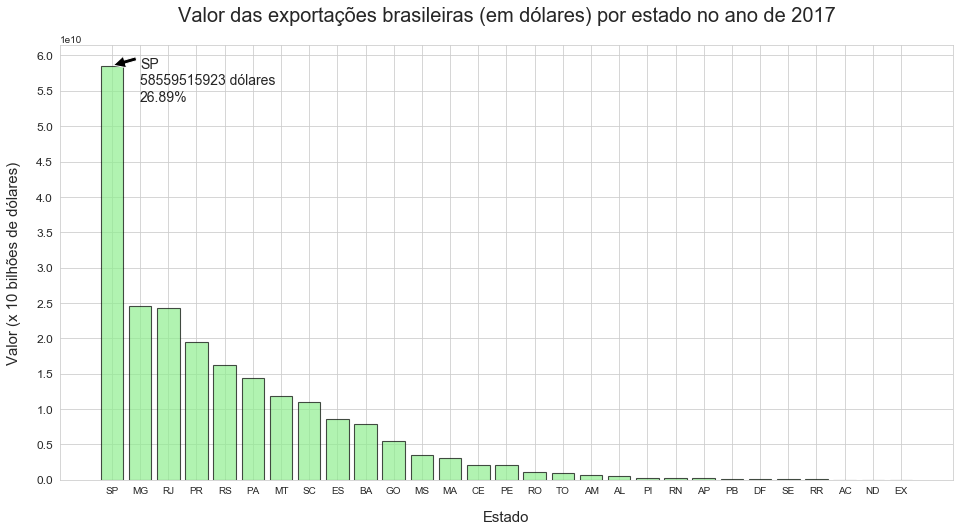

In [10]:
# GRAFICO DA BALANCA
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import seaborn as sns
f = plt.figure(figsize=(16,8))
plt.bar(balanca_estado.Estado,balanca_estado.Transacao, color='lightgreen', 
            edgecolor='black', linewidth = 1.1, alpha = 0.7)

# anotacao do estado de maior transacao
plt.annotate(str(balanca_estado.Estado.iloc[0])+'\n'+str(balanca_estado.Transacao.iloc[0])+' dólares\n'+
             str(round((balanca_estado.Porcentagem.iloc[0]*100),2)) + '%', 
             xy=(balanca_estado.Estado.iloc[0], balanca_estado.Transacao.iloc[0]), 
             xytext=(balanca_estado.Estado.iloc[1], balanca_estado.Transacao.iloc[0] - 0.5*10**10),
             arrowprops=dict(facecolor='black', shrink=0.05), size=14)

if tipo == 'EXP':
    palavra = 'exportações'
else:
    palavra = 'importações'
plt.title('Valor das '+ palavra +' brasileiras (em dólares) por estado no ano de '+ str(ano)  , size=20, y=1.04)
plt.xlabel('Estado', size = 15, labelpad = 15)
plt.ylabel('Valor (x 10 bilhões de dólares)', size=15, labelpad = 15)
plt.yticks(np.arange(0,max(lista_transacao_estado)+0.5*10**10,0.5*10**10),fontsize=12)

f.savefig(str(ano)+'_'+palavra.capitalize()+'_01_Grafico_Barras_'+'Valor_por_Estado.png', dpi=300)
plt.show()

-----

In [11]:
#nova tabela com 15 linhas
balanca_estado[:15]
balanca_estado_2 = balanca_estado[:15][['Estado','Transacao']]
#criacao de uma nova linha juntando do 15 para frente
balanca_estado_2.loc[16] = ['Outros', balanca_estado[balanca_estado.Porcentagem<0.0096].Transacao.sum()]
balanca_estado_2.tail()

,Estado,Transacao
12,MS,3514883974
10,MA,3015502510
5,CE,2113694364
17,PE,2092683612
16,Outros,4697878100


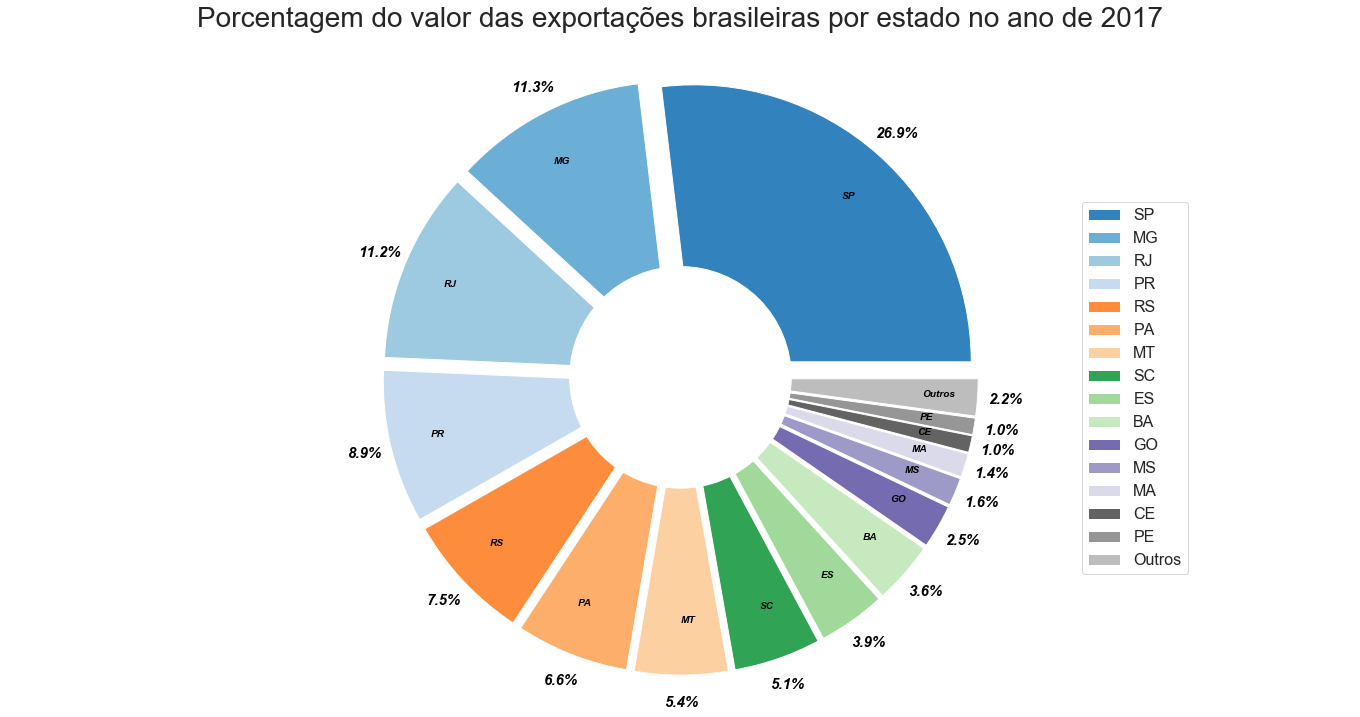

In [12]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches((24,12))

cs=cm.tab20c(np.arange(len(balanca_estado_2))/len(balanca_estado_2)) # cs=cm.tab20c(np.arange(16)/16)

explode = [0.3]*len(balanca_estado_2) #=(0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,0.3, 0.3, 0.3, 0.3, 0.3, 0.3)
ax1.pie(x=balanca_estado_2.Transacao, colors = cs, radius=4, autopct='%1.1f%%', explode = explode, labels = balanca_estado_2.Estado,
        shadow=False,pctdistance=1.1, labeldistance= 0.8,textprops={'fontsize': 15, 'color': 'black',
                                                                   'fontweight' : 'heavy', 'style':'italic'})

centre_circle = plt.Circle((0,0),1.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
if tipo == 'EXP':
    palavra = 'exportações'
else:
    palavra = 'importações'
plt.title('Porcentagem do valor das '+ palavra +' brasileiras por estado no ano de '+ str(ano)  , size=28, y=1.03)
plt.legend(balanca_estado_2.Estado, fontsize = 16, loc = (.8,.2))
fig.savefig(str(ano)+'_'+palavra.capitalize()+'_02_Grafico_Pizza_'+'Valor_por_Estado.png', dpi=300)

plt.show()

In [13]:
# media e mediana das transacoes
lista_estados = []
lista_mediana = []
lista_media = []
for i in df.SG_UF_MUN.cat.categories:
    lista_estados.append(i)
    lista_mediana.append(df[df.SG_UF_MUN == i].VL_FOB.median())
    lista_media.append(df[df.SG_UF_MUN == i].VL_FOB.mean())

In [14]:
data_media_mediana = pd.DataFrame({'Estado': lista_estados, 'Media': lista_media, 'Mediana': lista_mediana})
data_media_mediana.head()

,Estado,Media,Mediana
0,AC,2.651498e+04,3353.5
1,AL,1.107147e+06,21921.0
2,AM,1.744902e+05,11207.0
3,AP,1.796578e+06,85071.0
4,BA,7.035995e+05,47040.0


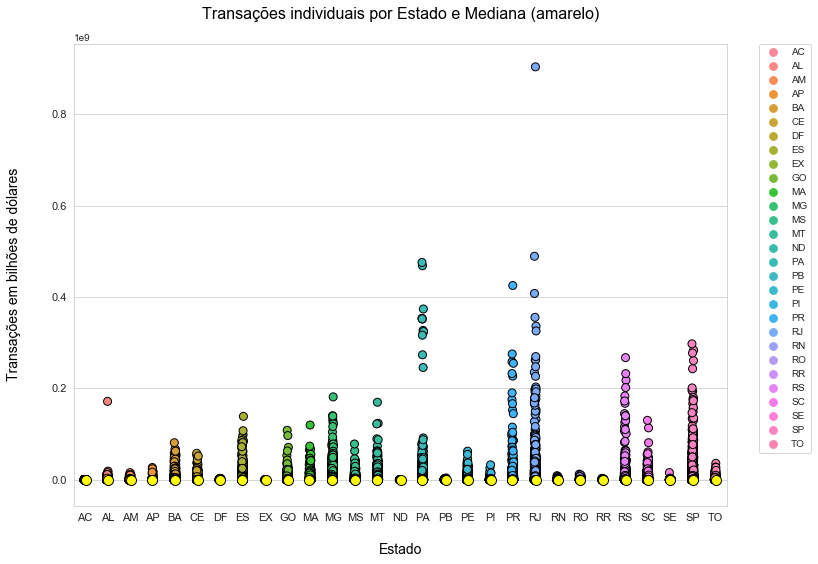

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.5)
sns.stripplot(data=df, x=df.SG_UF_MUN, y = df.VL_FOB, 
              hue=df.SG_UF_MUN, linewidth=1,
              size=8, edgecolor='black', jitter=0.04)

# MEDIANA
sns.stripplot(data=data_media_mediana, x=data_media_mediana.Estado, y = data_media_mediana.Mediana, linewidth=1,
              color = 'yellow', size=10, edgecolor='black', jitter=0.04)

plt.ylabel('Transações em bilhões de dólares', color = 'black', fontsize = 14, labelpad=30)
plt.xlabel('Estado', color = 'black', fontsize = 14, labelpad= 20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Transações individuais por Estado e Mediana (amarelo)', fontsize=16, color='black', fontname='Arial', y=1.04)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig(str(ano)+'_'+palavra.capitalize()+'_03_Grafico_Stripplot_'+'Valores_Individuais_por_Estado.png', dpi=300)

plt.show()

In [16]:
# quantidade

df_count = df.groupby('SG_UF_MUN').count()
df_count = df_count.sort_values('VL_FOB', ascending=False)
df_count = df_count.reset_index()

In [17]:
# media

df_mean = df.groupby('SG_UF_MUN').mean()
df_mean = df_mean.sort_values('VL_FOB', ascending=False)
df_mean = df_mean.reset_index()

In [18]:
# mediana

df_median = df.groupby('SG_UF_MUN').median()
df_median = df_median.sort_values('VL_FOB', ascending=False)
df_median = df_median.reset_index()

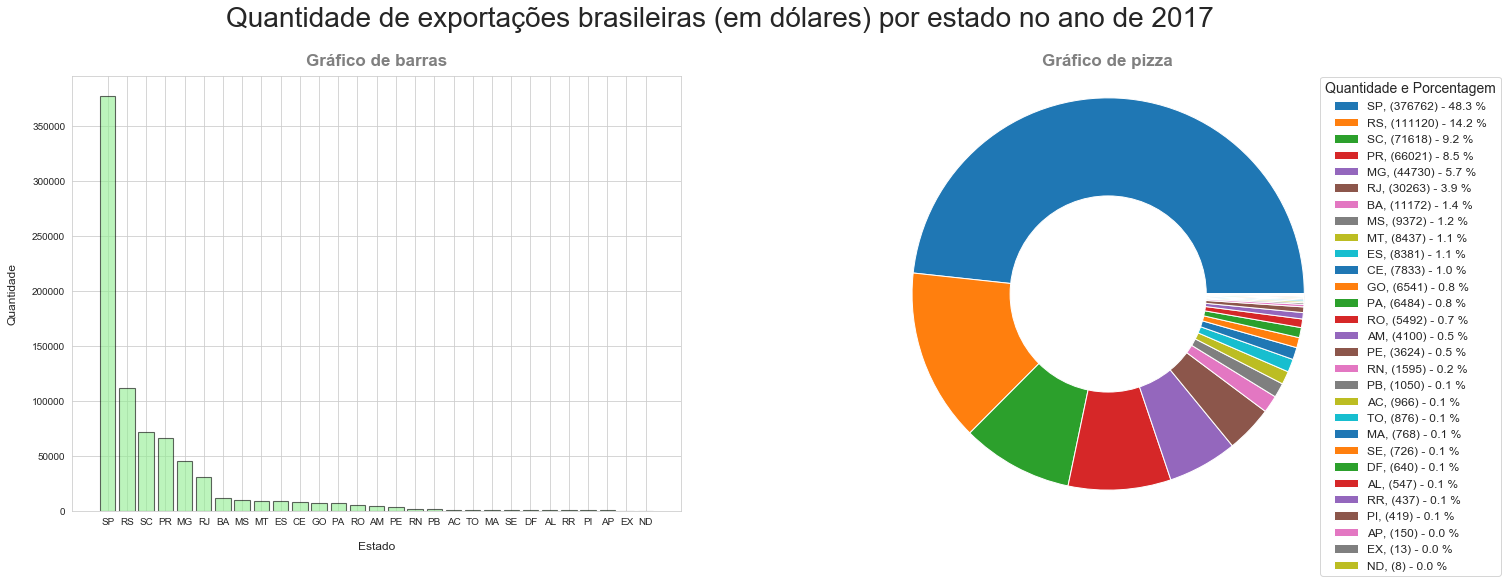

In [19]:
fig = plt.subplots(2,2,figsize=(24,8))

# barras
ax1 = plt.subplot(121)
plt.ylabel('Quantidade',size=12, labelpad=15)
plt.xlabel('Estado',size=12, labelpad=15)

ax1.bar(df_count.SG_UF_MUN,df_count.VL_FOB, color='lightgreen', edgecolor='black', linewidth = 1.1, alpha = 0.6)

# pie
ax2 = plt.subplot(122)

ax2.pie(x = df_count.VL_FOB)

centre_circle = plt.Circle((0,0),.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2.axis('equal')

# titulo de cada grafico
ax1.set_title('Gráfico de barras', size=17, fontweight='heavy', y=1.01, color = 'grey')
ax2.set_title('Gráfico de pizza', size=17, fontweight='heavy', y=1.01, color = 'grey')

ax2.axis('equal')
# titulo
fig.suptitle('Quantidade de '+ palavra +' brasileiras (em dólares) por estado no ano de '+ str(ano)  , size=28, y=1.)
legend = plt.legend(title = 'Quantidade e Porcentagem', labels=['%s, (%s) - %1.1f %%' % (l, p, s) for l, p, s in
                    zip(df_count.SG_UF_MUN, df_count.VL_FOB, (df_count.VL_FOB/df_count.VL_FOB.sum()*100))],
                    fontsize = 12,loc = (.85,-0.15))
plt.setp(legend.get_title(),fontsize=14)
fig.savefig(str(ano)+'_'+palavra.capitalize()+'_04_Grafico_Barras_Pizza_Valores_por_Estado.png', dpi=300)

plt.show()

In [20]:
df_count.head()

,SG_UF_MUN,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB
0,SP,376762,376762,376762,376762,376762,376762,376762
1,RS,111120,111120,111120,111120,111120,111120,111120
2,SC,71618,71618,71618,71618,71618,71618,71618
3,PR,66021,66021,66021,66021,66021,66021,66021
4,MG,44730,44730,44730,44730,44730,44730,44730


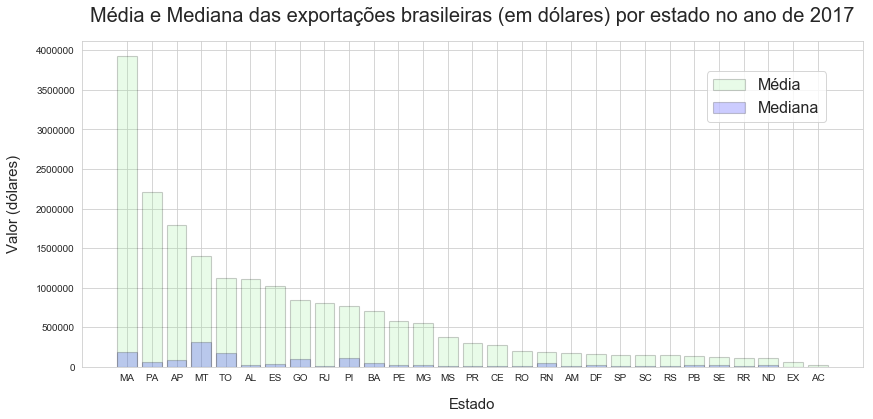

In [21]:
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(14,6))

f = plt.bar(df_mean.SG_UF_MUN,df_mean.VL_FOB, color='lightgreen', edgecolor='black', linewidth = 1.1, alpha = 0.2)
g = plt.bar(df_median.SG_UF_MUN,df_median.VL_FOB, color='blue', edgecolor='black', linewidth = 1.1, alpha = 0.2)

plt.title('Média e Mediana das '+ palavra +' brasileiras (em dólares) por estado no ano de '+ str(ano)  , size=20, y=1.04)
plt.xlabel('Estado', size = 15, labelpad = 15)
plt.ylabel('Valor (dólares)', size=15, labelpad = 15)

plt.legend([f,g],['Média','Mediana'], fontsize = 16, loc = (.8,.75))
fig.savefig(str(ano)+'_'+palavra.capitalize()+'_05_Grafico_Barras_Media_e_Mediana_por_Estado.png', dpi=300)

plt.show()

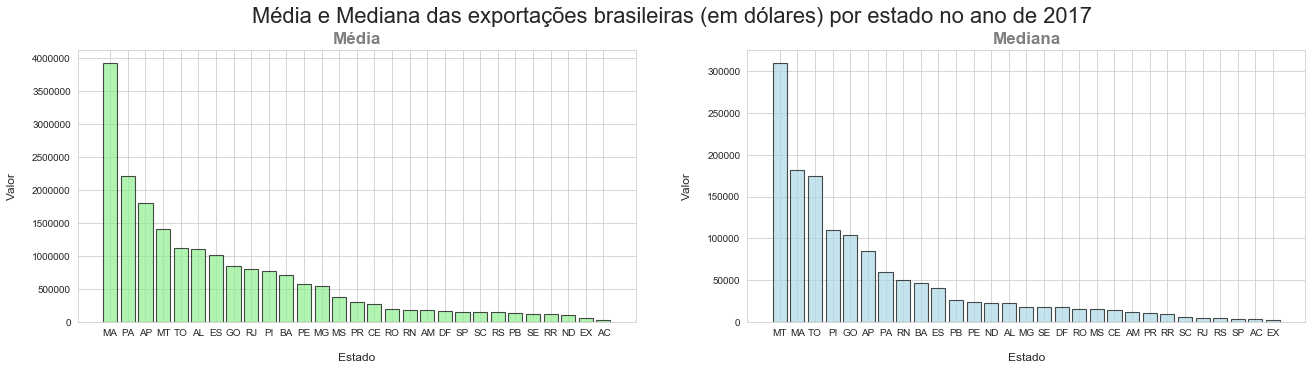

In [22]:
fig = plt.subplots(2,2,figsize=(22,5))

#media
ax1 = plt.subplot(121)
plt.ylabel('Valor',size=12, labelpad=15)
plt.xlabel('Estado',size=12, labelpad=15)

#mediana
ax2 = plt.subplot(122)
plt.ylabel('Valor',size=12, labelpad=15)
plt.xlabel('Estado',size=12, labelpad=15)

ax1.bar(df_mean.SG_UF_MUN,df_mean.VL_FOB, color='lightgreen', edgecolor='black', linewidth = 1.1, alpha = 0.7)
ax2.bar(df_median.SG_UF_MUN,df_median.VL_FOB, color='lightblue', edgecolor='black', linewidth = 1.1, alpha = 0.7)

ax1.set_title('Média', size=17, fontweight='heavy', y=1.0, color = 'grey')
ax2.set_title('Mediana', size=17, fontweight='heavy', y=1.0, color = 'grey')

plt.suptitle('Média e Mediana das '+ palavra +' brasileiras (em dólares) por estado no ano de '+ str(ano)  , size=22, y=1.)

plt.savefig(str(ano)+'_'+palavra.capitalize()+'_06_Graficos_Barras_Media_e_Mediana_por_Estado.png', dpi=300)

plt.show()

------


##  2. Análise por Países

-----

In [23]:
code_pais = pd.read_csv('Código dos Países.txt', sep=";")
code_pais.head()

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,N?o Definido,Not defined,No definido
1,13,4,AFG,Afeganist?o,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Alb?nia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"


In [24]:
df.head()

,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB
0,2017,7,7318,63,MG,3118601,2812,4032
1,2017,7,9018,603,SP,3450308,25,5037
2,2017,7,6104,249,SC,4204608,32,3342
3,2017,7,9032,249,SP,3449904,73,471617
4,2017,7,8708,23,SP,3423107,49699,535008


In [25]:
# LISTA COM OS CODIGOS DOS PAISES NA PLANILHA DE EXPORTACAO/IMPORTACAO
list_code_country = []
for i in df.CO_PAIS:
    list_code_country.append(i)

In [26]:
# A PARTIR DO DOCUMENTO DE TEXTO QUE ASSOCIA O PAIS COM SEU CODIGO, CRIA-SE UM DICIONARIO
dict_countries = code_pais.set_index('CO_PAIS')['NO_PAIS_ING'].to_dict()

In [27]:
# A PARTIR DO DICIONARIO, TRANSFORMA-SE OS CODIGOS DA LISTA NOS SEUS RESPECTIVOS NOMES DE PAISES
list_name_country = []
for i in list_code_country:
    list_name_country.append(dict_countries[i])

In [28]:
# CRIA-SE UMA NOVA COLUNA COM O NOME DOS PAISES
df['NOME_PAIS'] = list_name_country

In [29]:
df.head()

,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB,NOME_PAIS
0,2017,7,7318,63,MG,3118601,2812,4032,Argentina
1,2017,7,9018,603,SP,3450308,25,5037,Poland
2,2017,7,6104,249,SC,4204608,32,3342,United States
3,2017,7,9032,249,SP,3449904,73,471617,United States
4,2017,7,8708,23,SP,3423107,49699,535008,Germany


In [30]:
# COLUNA NOME DOS PAISES VIRA TIPO CATEGORIA
df.NOME_PAIS  = df.NOME_PAIS .astype('category')

# LISTA DA SOMA DAS TRANSACOES PARA CADA PAIS (CATEGORIA)
lista_transacao_pais = []
for i in df.NOME_PAIS.cat.categories.tolist():
    lista_transacao_pais.append(df[df.NOME_PAIS == i].VL_FOB.sum())

In [31]:
# NOVA DATAFRAME COM OS VALORES TOTAIS DE TRANSACAO NO ANO POR PAIS
DATA_PAIS_TRANSACAO = pd.DataFrame({'PAIS':df.NOME_PAIS.cat.categories.tolist(), 'TRANSACAO':lista_transacao_pais})
# ORDEM DECRESCENTE
DATA_PAIS_TRANSACAO = DATA_PAIS_TRANSACAO.sort_values(by=['TRANSACAO'], ascending=False)
# PORCENTAGEM DA RECEITA POR PAIS
DATA_PAIS_TRANSACAO['PORCENTAGEM'] = (DATA_PAIS_TRANSACAO.TRANSACAO/DATA_PAIS_TRANSACAO.TRANSACAO.sum())*100
DATA_PAIS_TRANSACAO.head()

,PAIS,TRANSACAO,PORCENTAGEM
42,China,47488449966,21.809783
222,United States,26872631189,12.341659
9,Argentina,17618822550,8.091708
145,Netherlands,9252264969,4.249241
103,Japan,5263291829,2.417246


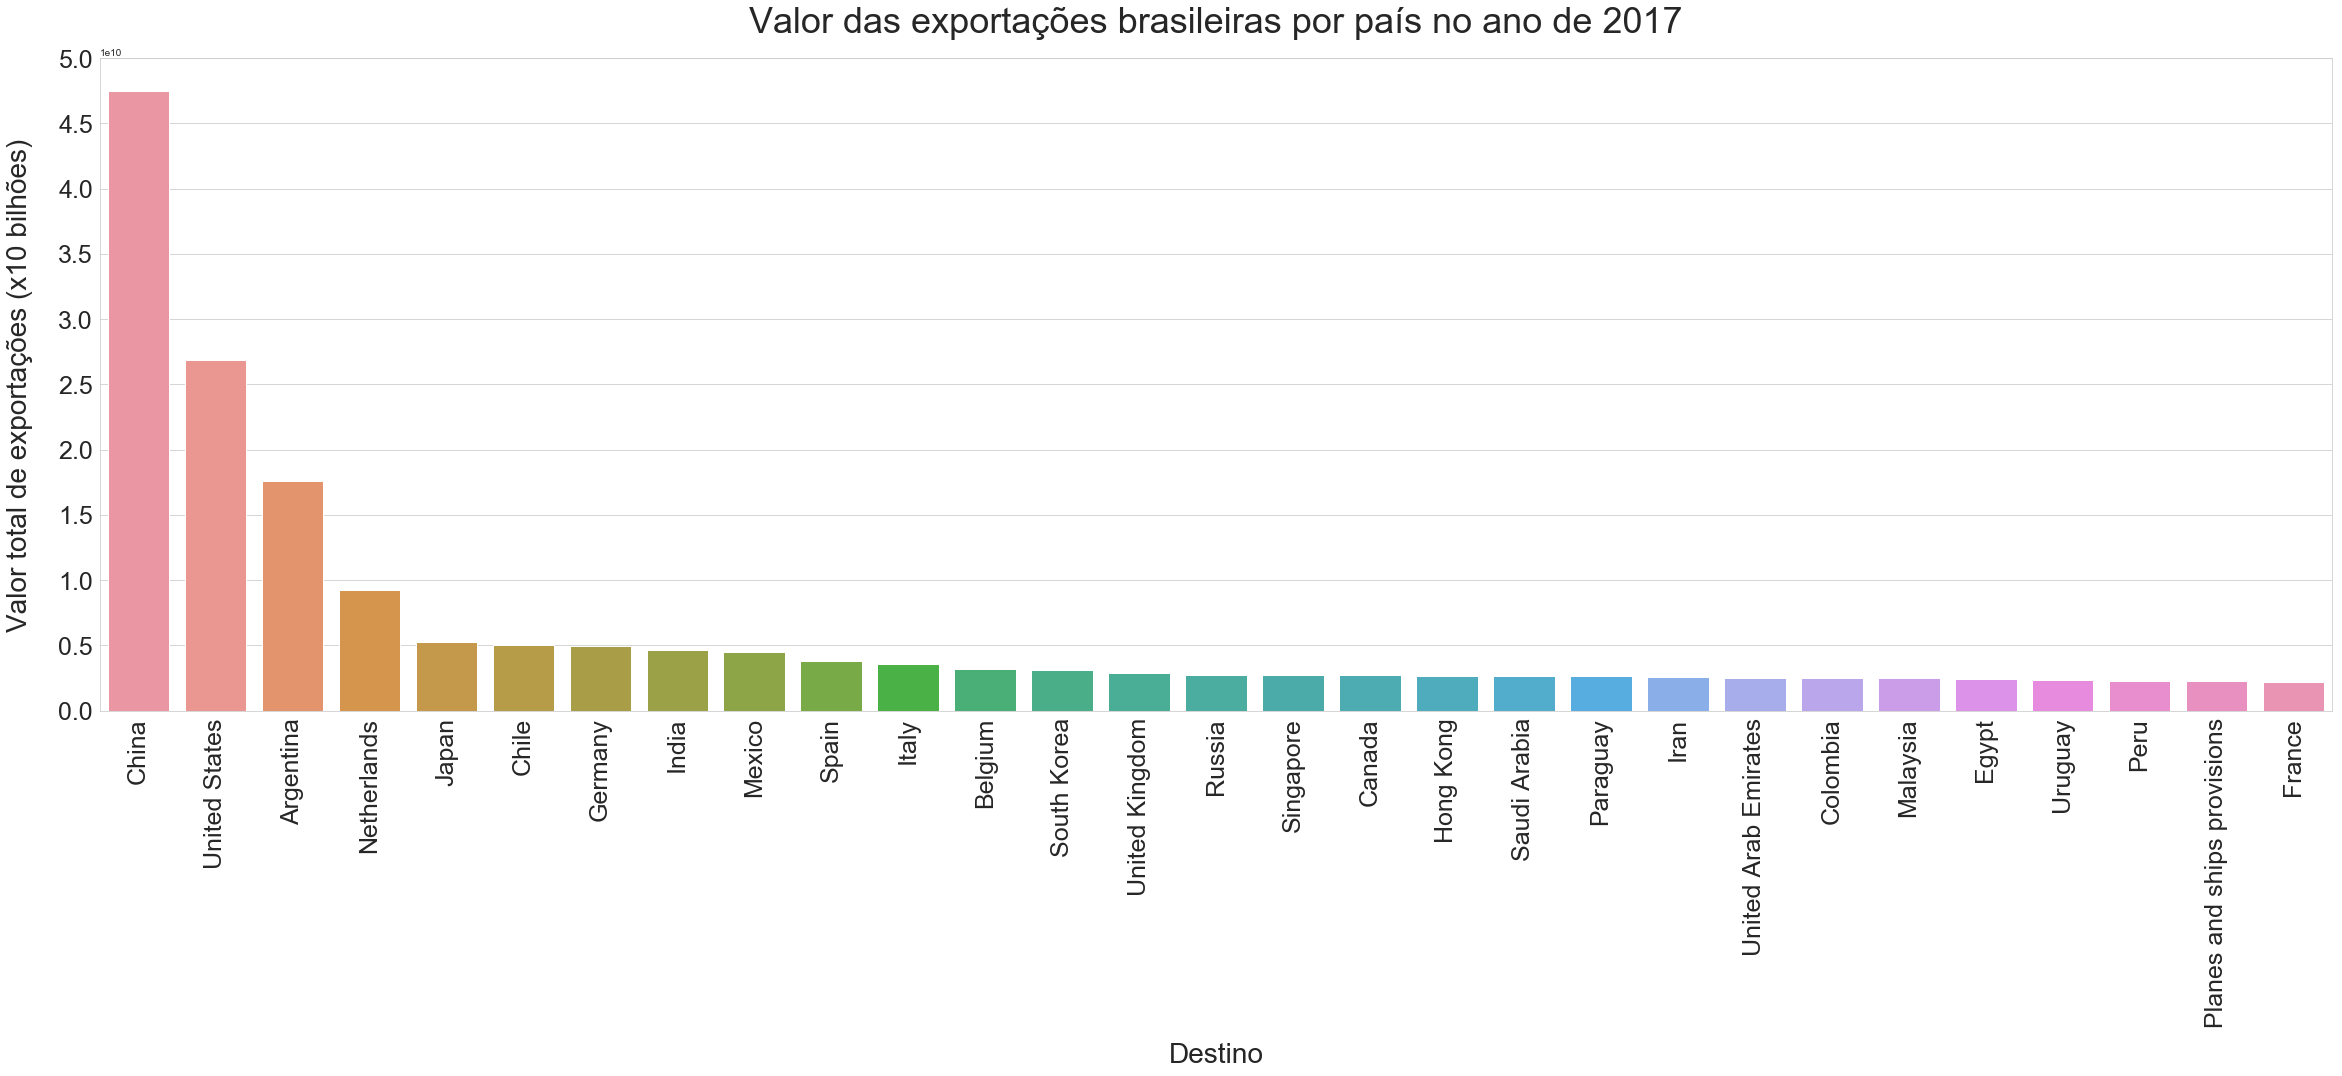

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(40,12))
sns.barplot(y="TRANSACAO", x="PAIS", data=DATA_PAIS_TRANSACAO[DATA_PAIS_TRANSACAO.PORCENTAGEM>1])
if tipo == 'EXP':
    palavra = 'exportações'
    palavra2 = 'Destino'
else:
    palavra = 'importações'
    palavra2 = 'Procedência'
plt.title('Valor das '+ palavra +' brasileiras por país no ano de '+ str(ano)  , size=36, y=1.03)
plt.xlabel(palavra2, size=28, labelpad = 15)
plt.ylabel('Valor total de '+palavra + ' (x10 bilhões)', size=28, labelpad = 25)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(np.arange(0,DATA_PAIS_TRANSACAO.TRANSACAO.max()+0.5*10**10,0.5*10**10), fontsize=25)
plt.show()

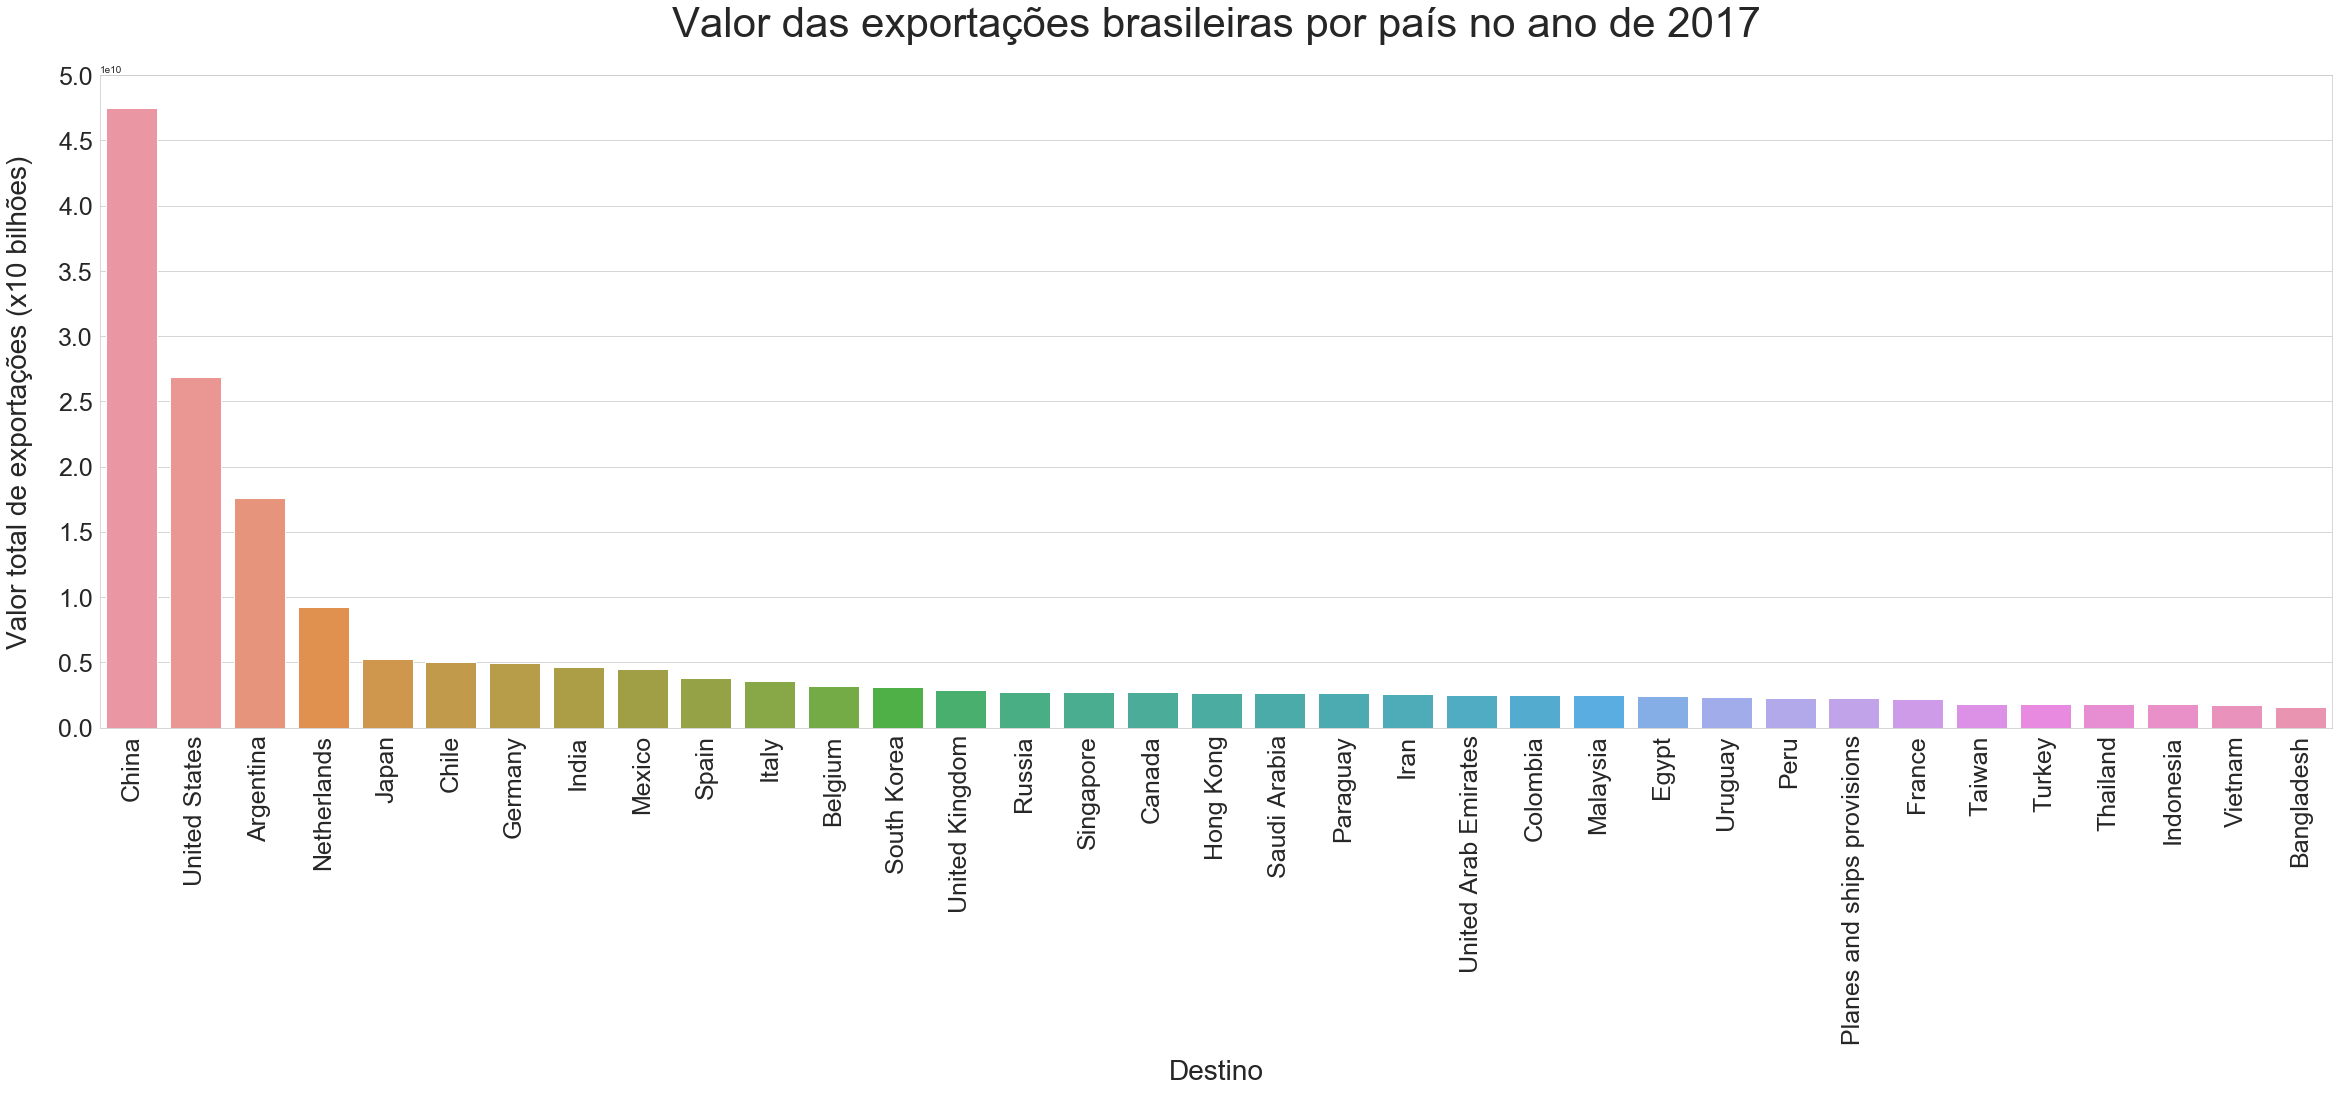

In [33]:
fig = plt.figure(figsize=(40,12))
sns.barplot(y="TRANSACAO", x="PAIS", data=DATA_PAIS_TRANSACAO.iloc[0:35])

if tipo == 'EXP':
    palavra = 'exportações'
    palavra2 = 'Destino'
else:
    palavra = 'importações'
    palavra2 = 'Procedência'
plt.title('Valor das '+ palavra +' brasileiras por país no ano de '+ str(ano)  , size=42, y=1.05)
plt.xlabel(palavra2, size=28, labelpad = 15)
plt.ylabel('Valor total de '+palavra + ' (x10 bilhões)', size=28, labelpad = 25)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(np.arange(0,DATA_PAIS_TRANSACAO.TRANSACAO.max()+0.5*10**10,0.5*10**10),fontsize=25)
fig.savefig(str(ano)+'_'+palavra.capitalize()+'_07_Grafico_Barras_Valor_por_Pais.png', dpi=300)

plt.show()

In [34]:
DATA_PAIS_TRANSACAO_2 = DATA_PAIS_TRANSACAO[:15][['PAIS','TRANSACAO']]
DATA_PAIS_TRANSACAO_2.loc[16] = ['Outros', DATA_PAIS_TRANSACAO[15:].TRANSACAO.sum()]
DATA_PAIS_TRANSACAO_2.tail()

,PAIS,TRANSACAO
20,Belgium,3174543312
195,South Korea,3077014473
221,United Kingdom,2844192661
173,Russia,2736531853
16,Outros,72922834653


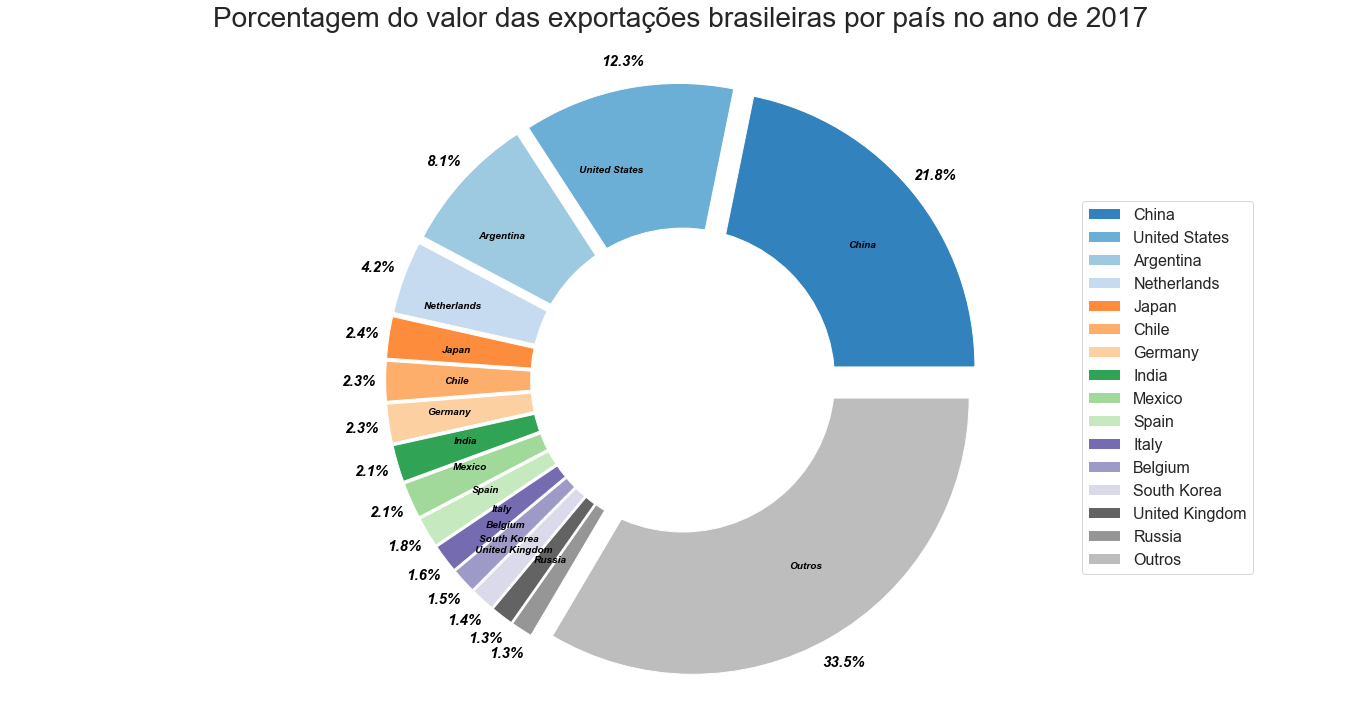

In [35]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches((24,12))

cs=cm.tab20c(np.arange(len(DATA_PAIS_TRANSACAO_2))/len(DATA_PAIS_TRANSACAO_2)) #cs=cm.tab20c(np.arange(16)/16)

explode = [0.3]*len(DATA_PAIS_TRANSACAO_2) #=(0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,0.3, 0.3, 0.3, 0.3, 0.3, 0.3)
ax1.pie(x=DATA_PAIS_TRANSACAO_2.TRANSACAO, colors = cs, radius=4, autopct='%1.1f%%', explode = explode, 
        labels = DATA_PAIS_TRANSACAO_2.PAIS,
        shadow=False,pctdistance=1.1, labeldistance= 0.7,textprops={'fontsize': 15, 'color': 'black',
                                                                   'fontweight' : 'heavy', 'style':'italic'})

centre_circle = plt.Circle((0,0),2.2,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
if tipo == 'EXP':
    palavra = 'exportações'
else:
    palavra = 'importações'
plt.title('Porcentagem do valor das '+ palavra +' brasileiras por país no ano de '+ str(ano)  , size=28, y=1.03)
plt.legend(DATA_PAIS_TRANSACAO_2.PAIS, fontsize = 16, loc = (.8,.2))
fig1.savefig(str(ano)+'_'+palavra.capitalize()+'_08_Grafico_Pizza_Valor_por_Pais.png', dpi=300)

plt.show()

In [36]:
DATA_PAIS_TRANSACAO_2.head()

,PAIS,TRANSACAO
42,China,47488449966
222,United States,26872631189
9,Argentina,17618822550
145,Netherlands,9252264969
103,Japan,5263291829


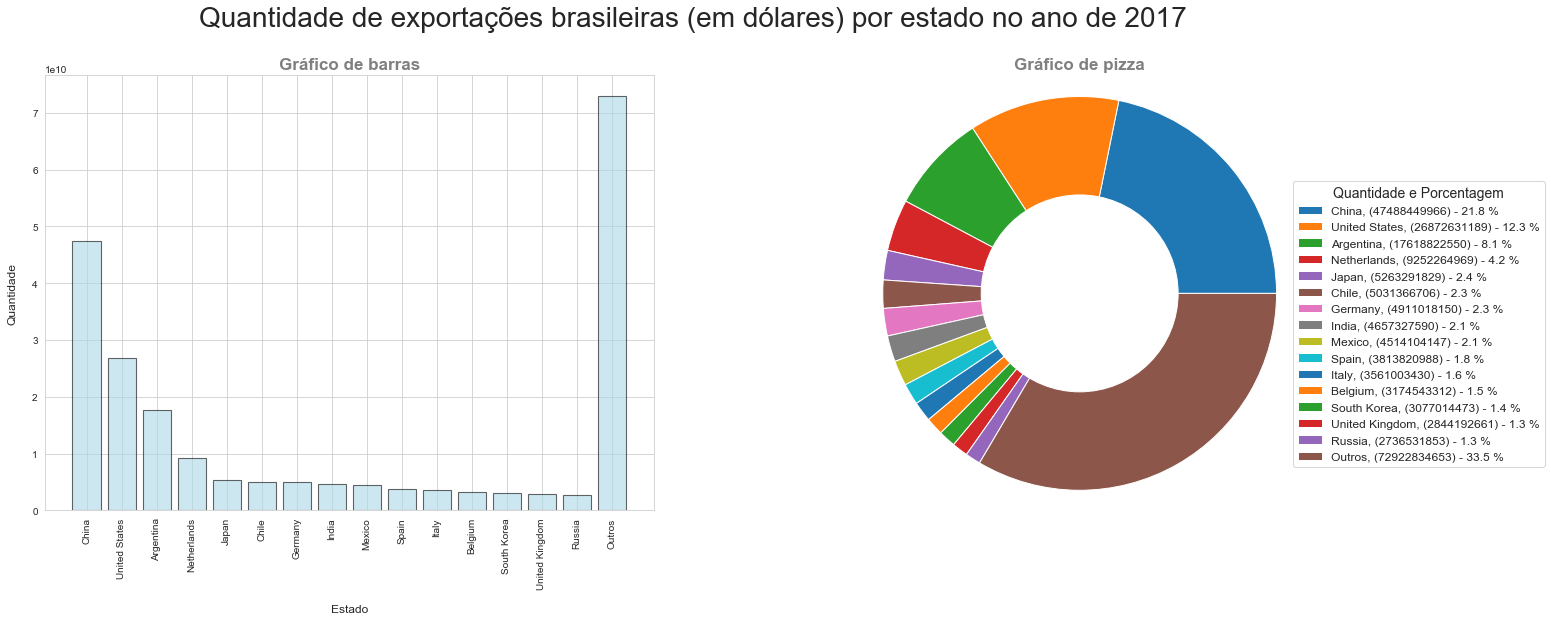

In [37]:
fig = plt.subplots(2,2,figsize=(24,8))

# barras
ax1 = plt.subplot(121)
plt.ylabel('Quantidade',size=12, labelpad=15)
plt.xlabel('Estado',size=12, labelpad=15)
plt.xticks(rotation= 90)

ax1.bar(DATA_PAIS_TRANSACAO_2.PAIS,DATA_PAIS_TRANSACAO_2.TRANSACAO, color='lightblue', 
        edgecolor='black', linewidth = 1.1, alpha = 0.6)

# pie
ax2 = plt.subplot(122)

ax2.pie(x = DATA_PAIS_TRANSACAO_2.TRANSACAO)

centre_circle = plt.Circle((0,0),.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2.axis('equal')

# titulo de cada grafico
ax1.set_title('Gráfico de barras', size=17, fontweight='heavy', y=1.0, color = 'grey')
ax2.set_title('Gráfico de pizza', size=17, fontweight='heavy', y=1.0, color = 'grey')

ax2.axis('equal')

# titulo
plt.suptitle('Quantidade de '+ palavra +' brasileiras (em dólares) por estado no ano de '+ str(ano)  , size=28, y=1.)

legend = plt.legend(title = 'Quantidade e Porcentagem', labels=['%s, (%s) - %1.1f %%' % (l, p, s) for l, p, s in
                    zip(DATA_PAIS_TRANSACAO_2.PAIS, DATA_PAIS_TRANSACAO_2.TRANSACAO, 
                        (DATA_PAIS_TRANSACAO_2.TRANSACAO/DATA_PAIS_TRANSACAO_2.TRANSACAO.sum()*100))],
                    fontsize = 12,loc = (.85,0.1))
plt.setp(legend.get_title(),fontsize=14)
fig.savefig(str(ano)+'_'+palavra.capitalize()+'_09_Grafico_Barras_Pizza_Valor_por_Pais.png', dpi=300)

plt.show()